<a href="https://colab.research.google.com/github/attilalr/Pygeostat_in_colaboratory/blob/main/Example_pygeostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Python script Pygeostat example in Colaboratory Google.

### The objective is to replicate some examples seen in http://www.ccgalberta.com/pygeostat/examples.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, shutil, sys

try:
  import pygeostat as gs
except:
  !pip3 install pygeostat
  !sed -i s/'from collections import MutableMapping'/'from collections.abc import MutableMapping'/g /usr/local/lib/python3.10/dist-packages/pygeostat/pygeostat_parameters.py
  import pygeostat as gs

In [4]:
work_folder = '/content/temp_folder'

### Getting and setting up the executables

The next cell will download the gslib executables and chmod +x all files in the executable folder.

In [5]:
# download the executables
gs.get_executable()

# to retrieve the executables folder lets find a previous known program [maybe there is a routine in pygeostat to get the folder]
example_prog = 'kt3d'

string_path_exec = os.popen('find /usr/local/lib -name \''+example_prog+'\'|head -n1').read()
string_path_exec = '/'.join(string_path_exec.split('/')[:-1])+'/'
print ('Executables folder: {}'.format(string_path_exec))

string_cmd = 'chmod +x '+string_path_exec+'*'
print ('Alterando permissão de execução: {}'.format(string_cmd))
os.system(string_cmd)

print ('Files under the executables folder:')
for file_ in os.listdir(string_path_exec):
  print (file_)

The software is available under gslib license agreement (http://www.gslib.com)
Executables folder: /usr/local/lib/python3.10/dist-packages/pygeostat/executable/
Alterando permissão de execução: chmod +x /usr/local/lib/python3.10/dist-packages/pygeostat/executable/*
Files under the executables folder:
gam
lusim
bivplt
bigaus
scatplt
locmap
anneal
cokb3d
kt3d
nscore
pixelplt
trans
pfsim
ellipsim
plotem
qpplt
Info.txt
postik
sgsim
sasim
addcoord
postsim
gamv
bicalib
vargplt
declus
draw
sisim
sisim_gs
scatsmth
backtr
vmodel
kb2d
sisim_lm
gtsim
rotcoord
varmap
probplt
histplt
ik3d
histsmth


Setting work folder.

In [6]:
try:
    os.mkdir(work_folder)
    print("Folder {} created.".format(work_folder)) 
except FileExistsError:
    print("Folder {} already exists.".format(work_folder)) 


Folder /content/temp_folder created.


In the next cell we are going to copy an example data to the work folder and open it.

In [7]:
example_datafile = 'point2d_surf'

# Lets put the data file in the work folder
dfl = gs.ExampleData(example_datafile)
shutil.copy(dfl.flname, work_folder)
print ('Files list in work folder {}:'.format(work_folder))
print (os.listdir(work_folder))

dfl = gs.DataFile(flname=work_folder+'/'+example_datafile+'.dat')

datafile_name = example_datafile+'.dat'

Files list in work folder /content/temp_folder:
['point2d_surf.dat']


### Lets 'see' the data first

Locmap

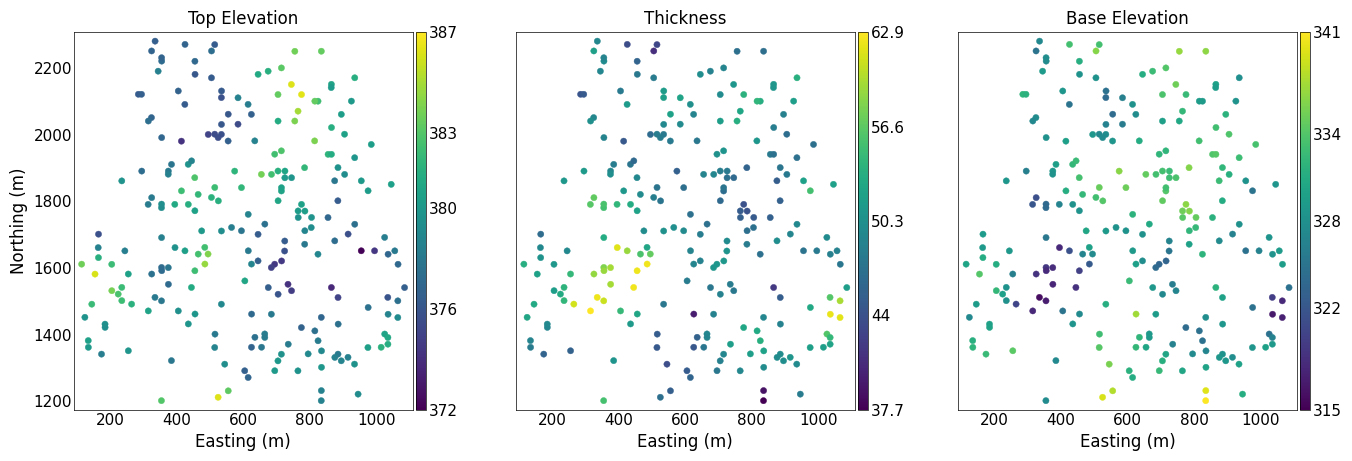

In [8]:
fig, axes = gs.subplots(1, len(dfl.variables), axes_pad=(0.9, 0.4), figsize= (25,5), cbar_mode='each', label_mode='L')
for i, var in enumerate(dfl.variables):
    gs.location_plot(dfl, var = var, ax = axes[i])

Histogram

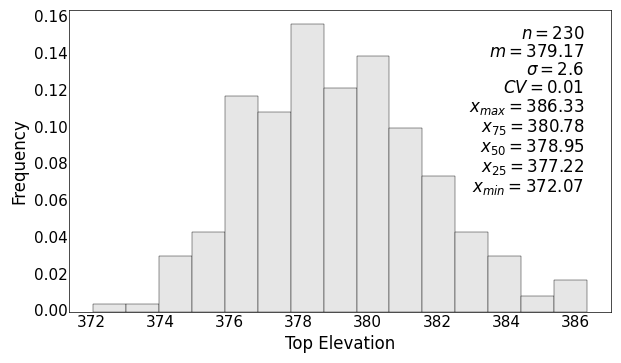

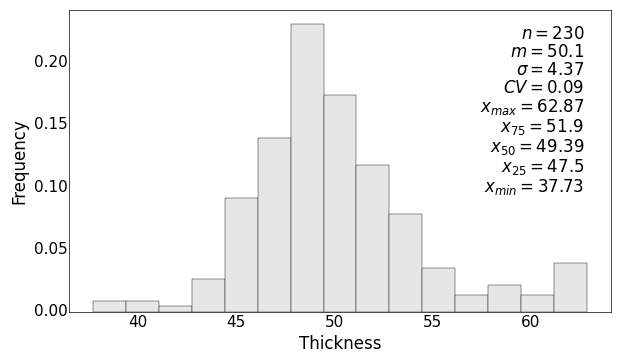

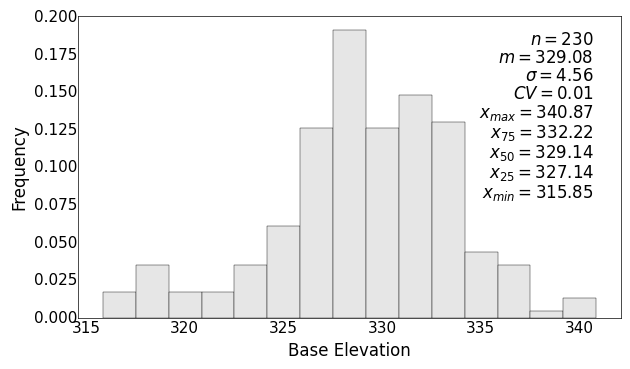

In [9]:
for var in dfl.variables:
    gs.histogram_plot(dfl, var=var, figsize = (7,4))

### Executing the first gslib program: nscore

Now it is time to execute a gslib program. The first step is to define the procedure to get the blank parameters file.

In [10]:
# choose the program
program = 'nscore'

# execute via system call
string_cmd = f'echo \'\'|{string_path_exec}{program}'
print (string_cmd)
print (os.popen(string_cmd).read())

# display the template parameter file
print ()
print ('### Copy the parameter file content below ###')
!cat /content/{program}.par

echo ''|/usr/local/lib/python3.10/dist-packages/pygeostat/executable/nscore

 NSCORE Version: 3.000

 Which parameter file do you want to use?
 ERROR - the parameter file does not exist,
         check for the file and try again  

         creating a blank parameter file



### Copy the parameter file content below ###
                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
../data/cluster.dat      -file with data
3   5                    -  columns for variable and weight
-1.0e21   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
../histsmth/histsmth.out -  file with reference dist.
1   2                    -  columns for variable and weight
nscore.out               -file for output
nscore.trn               -file for output transformation table


Now we copy the parstring from the last cell's output.
At the time of writing this script the disponible nscore software accept just one column at time.

Although it is easy to normal score all the desired columns using pandas we are going to continue to demonstrate how to execute a gslib program.

In [11]:
nscore_p = gs.Program(program = 'nscore')

# parstring fields to fill in

# input
datafile_name = os.path.join(work_folder, dfl.flname)

# parameters
tmin = gs.Parameters['data.tmin']
column = 4

# nscore output filenames
nscore_outfl = os.path.join(work_folder, 'nscore.out')
trnfl = os.path.join(work_folder, 'nscore.trn')

parstr = f"""
                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
{datafile_name}      -file with data
{column}   0              -  columns for variable and weight
{tmin}   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
nofile.out -  file with reference dist.
1   2                    -  columns for variable and weight
{nscore_outfl}               -file for output
{trnfl}               -file for output transformation table
"""

print (parstr)

nscore_p.run(parstr=parstr, quiet=False, liveoutput=True)

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!

                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
/content/temp_folder/point2d_surf.dat      -file with data
4   0              -  columns for variable and weight
-998.0   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
nofile.out -  file with reference dist.
1   2                    -  columns for variable and weight
/content/temp_folder/nscore.out               -file for output
/content/temp_folder/nscore.trn               -file for output transformation table

Calling:  ['/usr/local/lib/python3.10/dist-packages/pygeostat/executable/nscore', 'temp']

 NSCORE Version: 3.000

  data file = /content/temp_folder/point2d_surf.dat   
  columns =  4 0
  trimming limits =  -998. 1.E+21
  consider a different ref. dist. (1=yes) =  0
  file with reference distribution = nofile.out -         

In [12]:
# open the nscore output data
dfl_ns = gs.DataFile(nscore_outfl)
print (dfl_ns.flname)
dfl_ns.head()

/content/temp_folder/nscore.out


,HoleID,X,Y,Top Elevation,Thickness,Base Elevation,NS:Top Elevation
0,3.0,405.63,2135.75,376.69,47.98,328.71,-0.93038
1,5.0,235.89,1865.70,379.69,51.00,328.69,0.24772
2,6.0,325.03,2055.81,376.86,49.34,327.52,-0.81855
3,7.0,675.54,2195.25,381.49,48.75,332.74,0.88111
4,8.0,355.73,1995.74,376.97,48.94,328.03,-0.77366


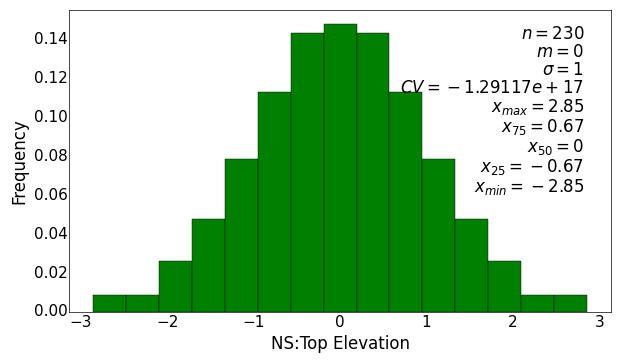

In [13]:
for var in dfl_ns.variables:
    if 'ns' in var.lower():
        gs.histogram_plot(dfl_ns, var=var, color='g', figsize = (7,4))